# This script is designed to graph speed profiles before approaching the beacon using imShow.

#### It should take beacons file, find time, match with position, then read however rows of position before and after and plot it. 

##### imports 

In [147]:
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib as mpl
import seaborn as sns
from matplotlib.patches import Circle
import matplotlib.tri as tri
import numpy as np
from scipy.spatial.transform import Rotation as R
import math

root = 'C:/Users/Fabian/Desktop/Analysis/Multiple_trial_analysis/Data/Raw/'
figures = 'C:/Users/Fabian/Desktop/Analysis/Multiple_trial_analysis/Figures/'

#Data with beacon metadata
beacon = pd.read_csv(root+'beacons 20200128-151826.txt',sep=" ", header=None)
beacon2 = pd.read_csv(root+'beacons 20200128-160013.txt',sep=" ", header=None)

beacon_Day86_fs2 = pd.read_csv(root+'beacons 20200128-151826.txt',sep=" ", header=None)
beacon_Day86_fs1 = pd.read_csv(root+'beacons 20200128-160013.txt',sep=" ", header=None)

beacon_Day87_fs2 = pd.read_csv(root+'beacons 20200129-153534.txt',sep=" ", header=None)
beacon_Day87_fs1 = pd.read_csv(root+'beacons 20200129-161806.txt',sep=" ", header=None)

beacon_Day88_fs2 = pd.read_csv(root+'beacons 20200130-102126.txt',sep=" ", header=None)
beacon_Day88_fs1 = pd.read_csv(root+'beacons 20200130-111741.txt',sep=" ", header=None)

beacon_Day89_fs2 = pd.read_csv(root+'beacons 20200130-161126.txt',sep=" ", header=None)
beacon_Day89_fs1 = pd.read_csv(root+'beacons 20200130-151829.txt',sep=" ", header=None)

beacon_Day90_fs2 = pd.read_csv(root+'beacons 20200203-154441.txt',sep=" ", header=None)
beacon_Day90_fs1 = pd.read_csv(root+'beacons 20200203-145842.txt',sep=" ", header=None)

beacon_Day91_fs2 = pd.read_csv(root+'beacons 20200204-125552.txt',sep=" ", header=None)
beacon_Day91_fs1 = pd.read_csv(root+'beacons 20200204-133905.txt',sep=" ", header=None)

beacon_Day92_fs2 = pd.read_csv(root+'beacons 20200205-143220.txt',sep=" ", header=None)
beacon_Day92_fs1 = pd.read_csv(root+'beacons 20200205-151052.txt',sep=" ", header=None)

beacon_Day93_fs2 = pd.read_csv(root+'beacons 20200206-133529.txt',sep=" ", header=None)
beacon_Day93_fs1 = pd.read_csv(root+'beacons 20200206-125706.txt',sep=" ", header=None)

Day46_fs1 = pd.read_csv(root+'position 20190923-174441.txt',sep=" ", header=None)
Day46_fs2 = pd.read_csv(root+'position 20190923-171112.txt',sep=" ", header=None)
Day47_fs1 = pd.read_csv(root+'position 20191001-112411.txt',sep=" ", header=None)
Day47_fs2 = pd.read_csv(root+'position 20191001-115127.txt',sep=" ", header=None)
Day48_fs1 = pd.read_csv(root+'position 20191002-115000.txt',sep=" ", header=None)
Day48_fs2 = pd.read_csv(root+'position 20191002-111038.txt',sep=" ", header=None)
Day51_fs1 = pd.read_csv(root+'position 20191106-170809.txt',sep=" ", header=None)
Day52_fs2 = pd.read_csv(root+'position 20191107-174215.txt',sep=" ", header=None)
Day52_fs1 = pd.read_csv(root+'position 20191107-183857.txt',sep=" ", header=None)
Day53_fs2 = pd.read_csv(root+'position 20191108-142321.txt',sep=" ", header=None)
Day53_fs1 = pd.read_csv(root+'position 20191108-145125.txt',sep=" ", header=None)
Day66_fs1 = pd.read_csv(root+'position 20191118-161325.txt',sep=" ", header=None)
Day66_fs2 = pd.read_csv(root+'position 20191118-171209.txt',sep=" ", header=None)
Day72_fs1 = pd.read_csv(root+'position 20191127-122008.txt',sep=" ", header=None)
Day72_fs2 = pd.read_csv(root+'position 20191127-132223.txt',sep=" ", header=None)


Day79_fs2 = pd.read_csv(root+'position 20200121-154004.txt',sep=" ", header=None)
Day79_fs1 = pd.read_csv(root+'position 20200121-161359.txt',sep=" ", header=None)

Day80_fs2 = pd.read_csv(root+'position 20200122-141738.txt',sep=" ", header=None)
Day80_fs1 = pd.read_csv(root+'position 20200122-133022.txt',sep=" ", header=None)

Day81_fs2 = pd.read_csv(root+'position 20200123-141930.txt',sep=" ", header=None)
Day81_fs1 = pd.read_csv(root+'position 20200123-150059.txt',sep=" ", header=None)

Day82_fs2 = pd.read_csv(root+'position 20200124-151642.txt',sep=" ", header=None)
Day82_fs1 = pd.read_csv(root+'position 20200124-160826.txt',sep=" ", header=None)

Day83_fs2 = pd.read_csv(root+'position 20200126-183810.txt',sep=" ", header=None)
Day83_fs1 = pd.read_csv(root+'position 20200126-180200.txt',sep=" ", header=None)

Day84_fs2 = pd.read_csv(root+'position 20200127-205615.txt',sep=" ", header=None)
Day84_fs1 = pd.read_csv(root+'position 20200127-155645.txt',sep=" ", header=None)

Day85_fs2 = pd.read_csv(root+'position 20200128-112255.txt',sep=" ", header=None)
Day85_fs1 = pd.read_csv(root+'position 20200128-104637.txt',sep=" ", header=None)

Day86_fs2 = pd.read_csv(root+'position 20200128-160013.txt',sep=" ", header=None)
Day86_fs1 = pd.read_csv(root+'position 20200128-151826.txt',sep=" ", header=None)

Day87_fs2 = pd.read_csv(root+'position 20200129-153534.txt',sep=" ", header=None)
Day87_fs1 = pd.read_csv(root+'position 20200129-161806.txt',sep=" ", header=None)

Day88_fs2 = pd.read_csv(root+'position 20200130-102126.txt',sep=" ", header=None)
Day88_fs1 = pd.read_csv(root+'position 20200130-111741.txt',sep=" ", header=None)

Day89_fs2 = pd.read_csv(root+'position 20200130-161126.txt',sep=" ", header=None)
Day89_fs1 = pd.read_csv(root+'position 20200130-151829.txt',sep=" ", header=None)

Day90_fs2 = pd.read_csv(root+'position 20200203-154441.txt',sep=" ", header=None)
Day90_fs1 = pd.read_csv(root+'position 20200203-145842.txt',sep=" ", header=None)

Day91_fs2 = pd.read_csv(root+'position 20200204-125552.txt',sep=" ", header=None)
Day91_fs1 = pd.read_csv(root+'position 20200204-133905.txt',sep=" ", header=None)

Day92_fs2 = pd.read_csv(root+'position 20200205-143220.txt',sep=" ", header=None)
Day92_fs1 = pd.read_csv(root+'position 20200205-151052.txt',sep=" ", header=None)

Day93_fs2 = pd.read_csv(root+'position 20200206-133529.txt',sep=" ", header=None)
Day93_fs1 = pd.read_csv(root+'position 20200206-125706.txt',sep=" ", header=None)


## now need to add a function which takes time from beacon and matches it with position information in position 

In [3]:
beacon = pd.read_csv(root+'beacons 20200128-151826.txt',sep=" ", header=None)
Day86_fs1 = pd.read_csv(root+'position 20200128-151826.txt',sep=" ", header=None)


## Get speed list! 

In [4]:
def calculateSpeed_list(x,y,time): 
    travel=0
    speed=[] 
    for i in range(len(y)-1):
        dist = math.sqrt((x[0+i] - x[1+i])**2 + (y[0+i] - y[1+i])**2)/time[0+i]
        speed.append(dist)   
    return (speed)




In [140]:
import numpy

time = numpy.arange(0.01, len(Day86_fs1[0]), 0.01)
time= np.array(Day86_fs1[0][1:]-Day86_fs1[0][0]) 
def calculateSpeed_list(x,y,time): 
    travel=0
    speed=[] 
    for i in range(len(y)-1):
        dist = math.sqrt((x[0+i] - x[1+i])**2 + (y[0+i] - y[1+i])**2)/time[0+i]
        speed.append(dist)   
    return (speed)

speed_list = calculateSpeed_list(Day86_fs1[1],Day86_fs1[3],time)
speed_list=np.array(speed_list)
speed_list


array([1.28241777e+00, 4.49595123e-01, 3.30493744e-01, ...,
       9.77006484e-08, 1.31449350e-07, 1.47630570e-07])

In [141]:
speed_list.shape

(107974,)

In [143]:
speed_list = calculateSpeed_list(Day86_fs1[1],Day86_fs1[3],time)
speed_list

[1.2824177652096278,
 0.44959512305801047,
 0.330493744487282,
 0.12930830377105912,
 0.05081225603824825,
 0.11186416519011409,
 0.02737621974459794,
 0.03289283226717771,
 0.03966993242476466,
 0.011329396050194923,
 0.003066217409571594,
 0.03267353629894204,
 0.011394062322256471,
 0.001832042869940058,
 0.01861674421410041,
 0.009971722495838307,
 0.009573156963812014,
 0.009372716588579341,
 0.006062378412132485,
 0.00563055851702624,
 0.00670551297037468,
 0.006629235764821529,
 0.006386661941589034,
 0.007163487765092201,
 0.008732515544211027,
 0.009273820154984626,
 0.008761005748318998,
 0.009117448107065856,
 0.009101739911278968,
 0.007893437635251176,
 0.008536682484412842,
 0.011540404921321818,
 0.008741572743291756,
 0.012527601675971986,
 0.010579239369471954,
 0.012146595075806248,
 0.006463235450713174,
 0.006283885642320802,
 0.005445404258570565,
 0.0025352014223719863,
 0.0017899702542849194,
 0.002270796982539119,
 0.001525857282716352,
 0.0008475086608272216,
 

In [136]:
speed_list.shape 

(107974,)

## Freguency 100hz

# I mean that speed is shown as pseudo-color, x-axis is time from beacon zone crossing, y-axis - trial number

## Trying imshow plot()


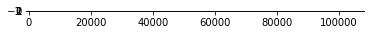

In [6]:
time = numpy.arange(1, len(Day86_fs1[0]), 1)
time_speed = np.vstack((time,speed_list))
plt.imshow(time_speed)


In [7]:
time_speed.shape

(2, 107974)

In [8]:
time.shape

(107974,)

In [9]:
speed_list.shape

(107974,)

In [12]:
data.shape


(10, 20)

In [13]:
data

array([[3.96287976e-07, 9.05677855e-09, 3.22440345e-07, 1.08714671e-07,
        2.96859328e-07, 1.07273463e-07, 1.07799965e-07, 4.99707353e-08,
        2.42008992e-08, 1.00565368e-07, 8.93621242e-08, 2.08090164e-07,
        3.92128771e-07, 2.61208554e-07, 3.02519289e-07, 6.43017016e-08,
        2.37361426e-07, 2.54448528e-07, 3.93408730e-08, 3.09751173e-08],
       [3.11901190e-07, 2.68853548e-07, 2.09185409e-07, 1.88224889e-07,
        3.21964827e-07, 1.90601552e-07, 1.73422503e-07, 3.21782138e-07,
        2.50038188e-08, 2.33772493e-07, 8.26784224e-08, 1.41343526e-07,
        7.84842737e-08, 8.23625392e-08, 2.32825172e-08, 3.09545006e-07,
        3.08751585e-07, 1.68949786e-07, 2.94851627e-08, 2.68848093e-07],
       [3.23874327e-07, 8.44302906e-08, 2.26742430e-07, 7.33418526e-08,
        1.99435128e-07, 2.66383801e-07, 2.48041684e-07, 2.46126660e-07,
        6.84061166e-08, 2.85295667e-07, 1.30406435e-08, 3.24212196e-07,
        3.14008972e-07, 3.83429463e-07, 3.61900490e-08, 1.0312

In [ ]:
speed_list



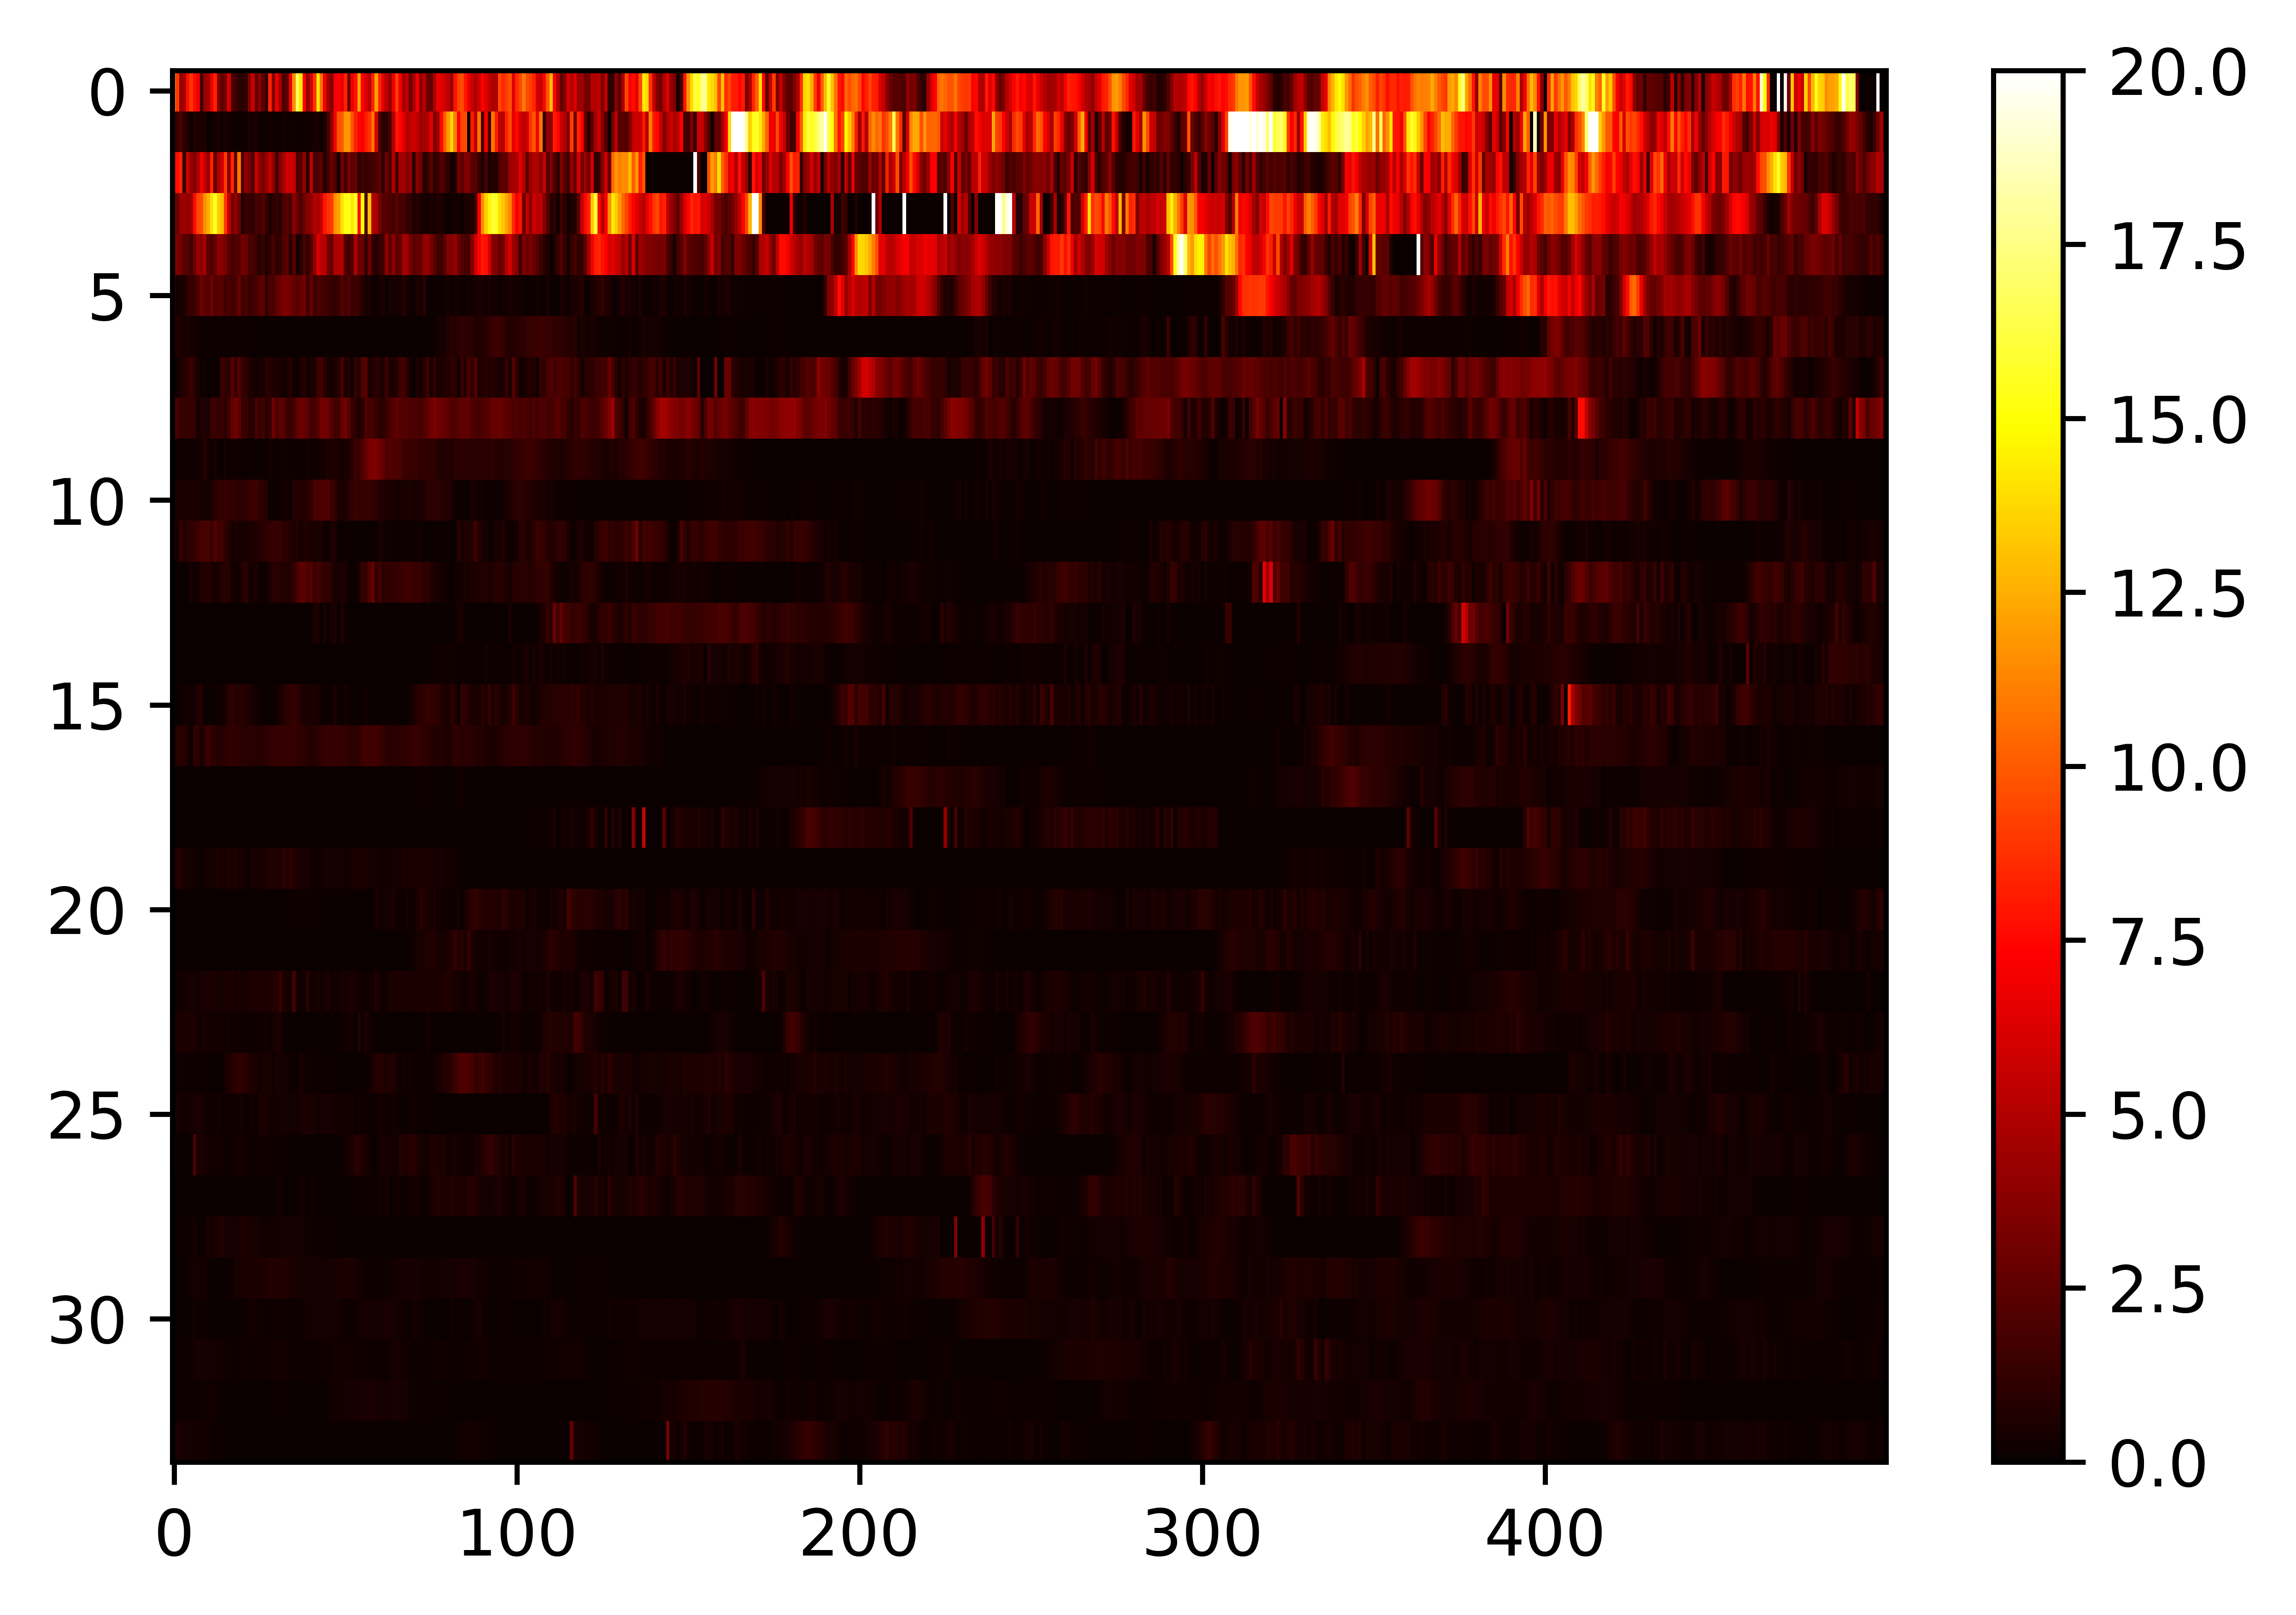

<Figure size 432x288 with 0 Axes>

In [27]:
position_data = Day86_fs1
beacon_data = beacon
seconds_back = 5
session = '86'

time_since_list =((np.array(beacon_data [0]))-(np.array(position_data[0]))[0])    
enum = list(np.arange(0,len(list(time_since_list)),1))
    
index=[]
for i in enum:
    index.append(np.abs(np.array(beacon_data [0])[i]-np.array(position_data[0])).argmin() )
    
    

time = numpy.arange(0.01, len(position_data[0]), 0.01)
speed_list = calculateSpeed_list(position_data[1],position_data[3],time)
speed_list = [element * 100000 for element in speed_list] # to get to cm/s speed. 
time = numpy.arange(-seconds_back,seconds_back,.01)      

fig, ax = plt.subplots()
fig.dpi = 1000


list_of_speed_lists=[]
for i in index:        
    if i <= 500:
        i = 501
    else:
        list_of_speed_lists.append(speed_list[i-(seconds_back*100):i])
        
        
#print(list_of_speed_lists)
array = np.array(list_of_speed_lists).reshape(34,500)

im = ax.imshow(array, cmap=plt.get_cmap('hot'), interpolation='nearest',aspect='auto',
               vmin=0, vmax=20)
fig.colorbar(im)
plt.show()
plt.savefig(figures+'imshow_speed_'+ session +'.png', dpi = 100)


## TODO: write a summary of findings

20 seconds in session 86, with 20 max speed filter showing 17 beacons  invisible trials 


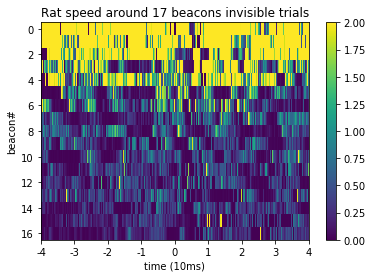

In [151]:


def Speed_before_beacon (session,seconds_back,position_data,beacon_data,max_speed,visible=all,height=False): 
    """function plots a given amount of seconds before beacon reached, takes Beacon file, position file, ceiling on speed for filtering """
    
    # still 
    time_since_list =((np.array(beacon_data [0]))-(np.array(position_data[0]))[0])    
    enum = list(np.arange(0,len(list(time_since_list)),1))
    index=[]
    beacon_times = np.array(beacon_data[0])
  
    
    for i in enum:
        index.append(np.abs(beacon_times[i]-np.array(position_data[0])).argmin() )
        
    if height== False:
        num=3
    else:
        num=2
        
    
    time = numpy.arange(0.01, len(position_data[0]), 0.01)
    speed_list = calculateSpeed_list(position_data[1],position_data[num],time)
    speed_list = [element * 100000 for element in speed_list] # to get to cm/s speed. 
    time = numpy.arange(-seconds_back,seconds_back,.01)       

    fig, ax = plt.subplots()
    
    # involve gaussian smoothening. 
    if visible == True:
        index = index[::2]
        eye='visible trials'
    elif visible == False:
        index = index[1::2] 
        eye = 'invisible trials'
    else: 
        index=index
        eye = 'all trials'
            
    
    list_of_speed_lists=[]
    for i in index:        
        if i <= 500:
            i = 501
        else:
            list_of_speed_lists.append(speed_list[i-(seconds_back*100):i+(seconds_back*100)])
        
        

    array = np.array(list_of_speed_lists).reshape(len(index),seconds_back*200) # can add or delete one if indexing issue

    im = ax.imshow(array, cmap=plt.get_cmap('viridis'),aspect='auto',vmin=0, vmax=2,)
    fig.colorbar(im)

    ax.set(xlabel='time (10ms)', ylabel='beacon#',
           title='Rat speed around %s beacons %s' %(len(index),eye))
    #ax.grid()
    x_label_list = ['-5','-4','-3','-2','-1','0','1','2','3','4','5']
    ax.set_xticklabels(x_label_list)
    ax.set_alpha (alpha = .5)
    print('%s seconds in session %s, with %s max speed filter showing %s beacons  %s '% (seconds_back*2, session, max_speed,len(index),eye))

    plt.savefig(figures+'imshow_speed_'+ session +'.png', dpi = 1000)
    plt.show()
Speed_before_beacon ('86',10,Day86_fs1,beacon,20,visible=False,height=False)

In [65]:
(np.arange (-10,10,1))
seconds_back*100

500

## Plot speed over the whole session

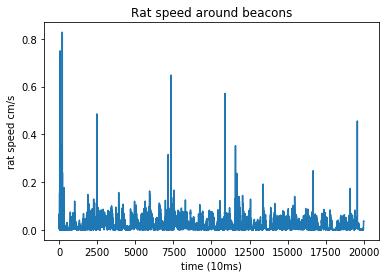

In [146]:
time= np.array(Day86_fs1[0][1:]-Day86_fs1[0][0]) 
speed_list = calculateSpeed_list(Day86_fs1[1],Day86_fs1[3],time)
speed_list = [element * 10000 for element in speed_list]
fig, ax = plt.subplots()
ax.set(xlabel='time (10ms)', ylabel='rat speed cm/s',
           title='Rat speed around beacons')
ax.plot(speed_list[50000:70000])


In [116]:
time= np.array(Day86_fs1[0]-Day86_fs1[0][0]) 

In [118]:
time.shape

(107975,)

### I know it is simple, but since it records at 100hz I multiplied by 100 to get to s and then by 100 to get from m to cm but still seems slow.  

## Integrate the acceleration of each axis then add together the velocity vectors, and finally take the magnitude. You now have speed.

## Showing speed over all trials

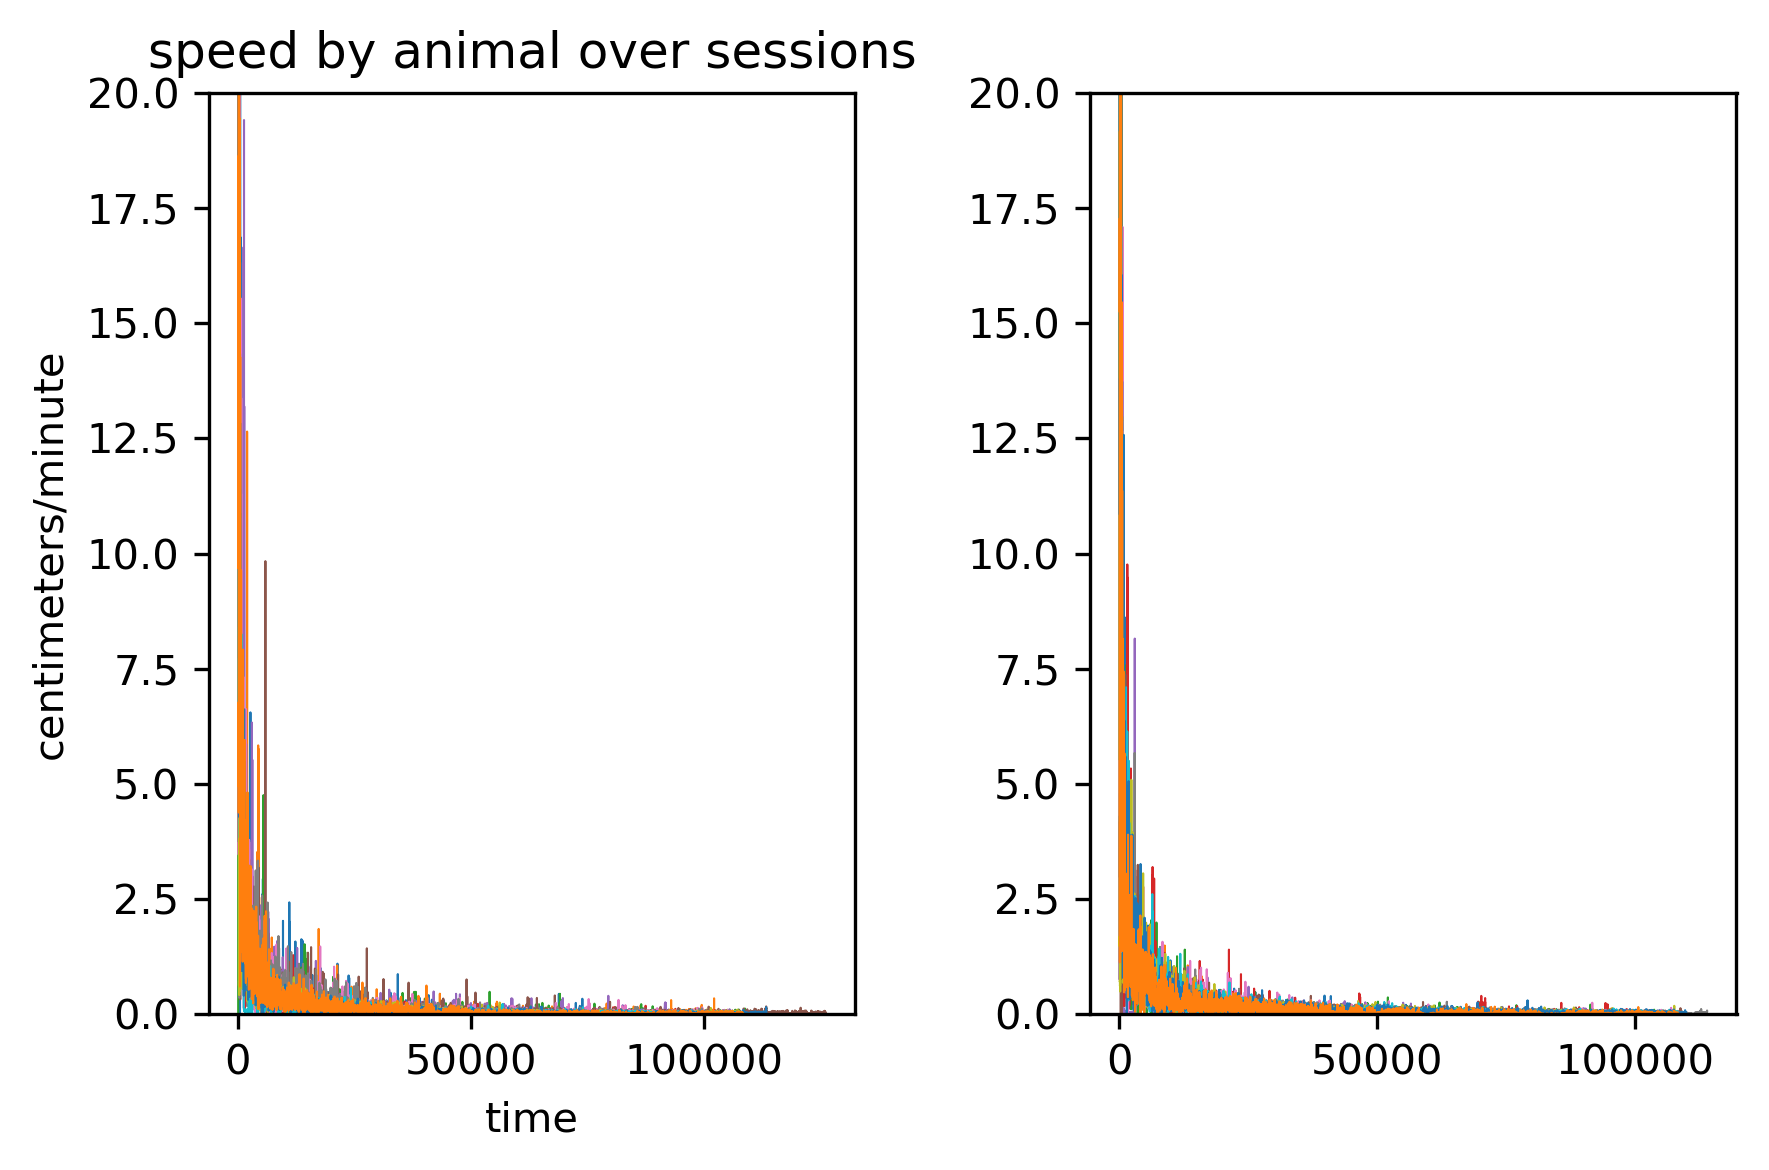

In [193]:
from scipy.ndimage.filters import gaussian_filter1d

list_of_days = [Day79_fs1,Day80_fs1,Day81_fs1,Day82_fs1,Day83_fs1,Day84_fs1,Day85_fs1,Day86_fs1,Day87_fs1,Day88_fs1,Day89_fs1,Day90_fs1]
list_of_days2 = [Day79_fs2,Day80_fs2,Day81_fs2,Day82_fs2,Day83_fs2,Day84_fs2,Day85_fs2,Day86_fs2,Day87_fs2,Day88_fs2,Day89_fs2,Day90_fs2]
Day_number_list =['79','80','81','82','83','84','85','86','87','88','89','90']

def calculateSpeed_list(x,y,time): 
    travel=0
    speed=[] 
    for i in range(len(y)-1):
        dist = math.sqrt((x[0+i] - x[1+i])**2 + (y[0+i] - y[1+i])**2)/time[0+i]
        speed.append(dist)   
    return (speed)


def Speed_over_days (list_of_fs1_days,list_of_fs2_days,list_of_number_of_days,smoothening = 5,cut=500 ) :
    """this function takes lists of days for each animal and plots the averge speed for a day over given days. """
    
    fig, ax = plt.subplots(1,2, dpi=300)
    
    LT_distance_fs2 = []
    for day in list_of_fs1_days:
        speed_list = (calculateSpeed_list(list(day[1][cut:]),list(day[3][cut:]),numpy.arange(0.01, len(day[0][cut:]), 0.01)))
        speed_list = [element * 10000 for element in speed_list] # to get to cm/s speed. 
        ysmoothed = gaussian_filter1d(speed_list, sigma=smoothening)
        ax[0].plot((numpy.arange(0, len(day[0][cut:])-1, 1)),ysmoothed,linewidth=.5)
        
   
    for day in list_of_fs2_days:
        speed_list = (calculateSpeed_list(list(day[1][cut:]),list(day[3][cut:]),numpy.arange(0.01, len(day[0][cut:]), 0.01)))
        speed_list = [element * 10000 for element in speed_list] # to get to cm/s speed. 
        ysmoothed = gaussian_filter1d(speed_list, sigma=smoothening)
       
        ax[1].plot((numpy.arange(0, len(day[0][cut:])-1, 1)),ysmoothed,linewidth=.5)

   
    ax[0].set_ylabel('centimeters/minute')
    ax[0].set_xlabel('time')
    ax[0].set_title('speed by animal over sessions')
    ax[0].set_ylim([0,20])
    ax[1].set_ylim([0,20])
    
    fig.tight_layout()
    plt.savefig(figures+'speed_stretched_over_days_'+Day_number_list[0]+'-'+Day_number_list[-1]+'.png', dpi = 1000)
    plt.show()
    
Speed_over_days(list_of_days, list_of_days2, Day_number_list) 


In [165]:
for day in list_of_days2:
    speed_list = (calculateSpeed_list(list(day[1]),list(day[3]),numpy.arange(0.01, len(day[0]), 0.01)))

In [166]:
speed_list

[0.15756132909191517,
 0.09890177184178693,
 0.052674330576945795,
 0.026828630579361808,
 0.020794739058819813,
 0.039455976255482965,
 0.04176131599189586,
 0.036332309192525516,
 0.026108433059007372,
 0.012886548415566815,
 0.00605566192730634,
 0.009034827119970234,
 0.017981905022089333,
 0.014079845491682067,
 0.024859185169764778,
 0.014135762863048988,
 0.012673356040788094,
 0.01256673428902911,
 0.01308340410348942,
 0.017906827124637047,
 0.010615468558546665,
 0.012639414490382495,
 0.011412511522943708,
 0.0038777078454448255,
 0.004794776063062088,
 0.0017669542671732194,
 0.0009130423391428917,
 0.001058976960576983,
 0.0023320882288846274,
 0.003997291297113186,
 0.015778503659236814,
 0.0023371659086678176,
 0.004441440032741277,
 0.008070774166965363,
 0.02496034433393331,
 0.004323053799405349,
 0.015194714223359483,
 0.008373909401631288,
 0.004934652776378348,
 0.0,
 0.0,
 0.0459103058953759,
 0.013980718986432819,
 0.015805832288166604,
 0.011784768910883625,
 0.